In [1]:
# Triada calsica
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import warnings
import missingno as msngo

# Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score


from cv_error import *
import func as gfx
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('seaborn-darkgrid')

In [2]:
df = pd.read_csv('Datasets/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


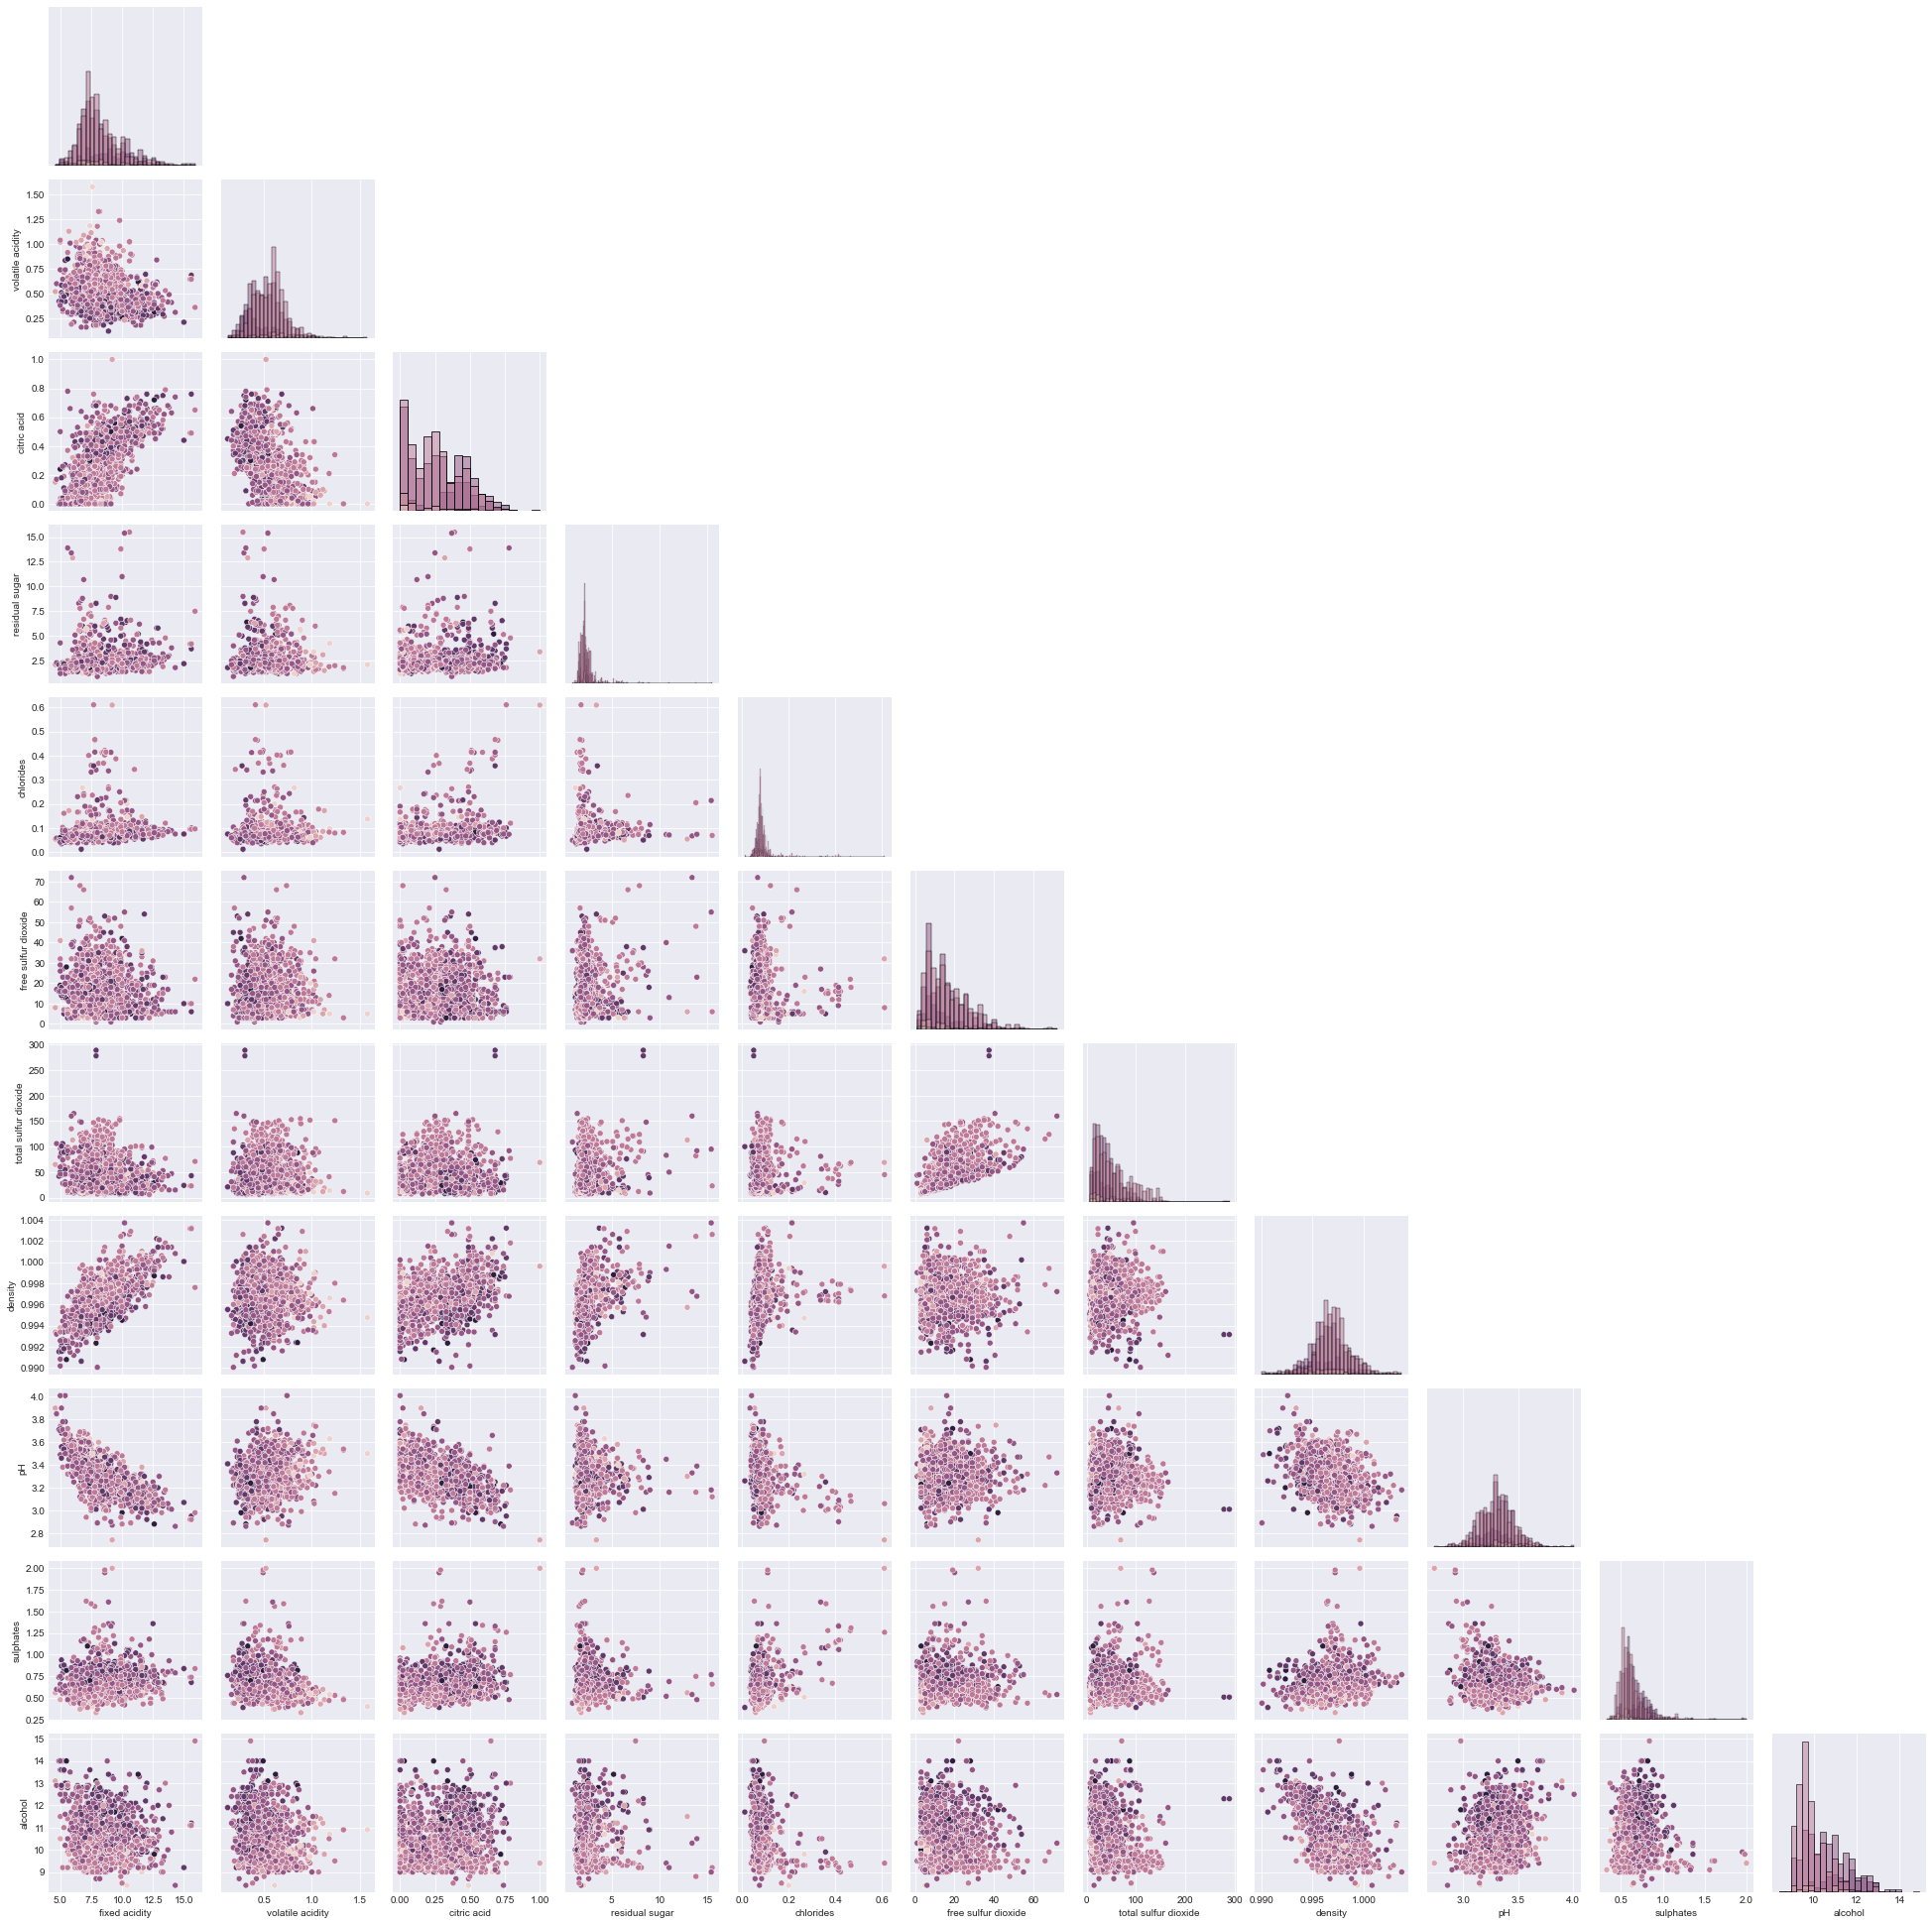

In [3]:
g = sns.PairGrid(df, corner = True, hue = 'quality')
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)

In [4]:
X = df.drop(columns = 'quality')
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 15820)

In [5]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
ridge = RidgeCV(cv = 10).fit(X_train, y_train)
lasso = LassoCV(cv = 10).fit(X_train, y_train)
enet = ElasticNetCV(cv = 10).fit(X_train, y_train)

In [7]:
from sklearn.metrics import mean_absolute_error


print(f'''Metricas para RIDGE
MSE: {np.sqrt(mean_squared_error(y_test, ridge.predict(X_test)))}
MAE: {mean_absolute_error(y_test, ridge.predict(X_test))}
Metricas para LASSO
MSE: {np.sqrt(mean_squared_error(y_test, lasso.predict(X_test)))}
MAE: {mean_absolute_error(y_test, lasso.predict(X_test))}
Metricas para ELASTIC NET
MSE: {np.sqrt(mean_squared_error(y_test, enet.predict(X_test)))}
MAE: {mean_absolute_error(y_test, enet.predict(X_test))}
''')

Metricas para RIDGE
MSE: 0.6745823128591157
MAE: 0.5211423527782493
Metricas para LASSO
MSE: 0.6733204669666105
MAE: 0.5213346776958558
Metricas para ELASTIC NET
MSE: 0.6732764914626318
MAE: 0.5215638505289236



In [8]:
df_coef = pd.DataFrame({'Ridge':ridge.coef_, 'Lasso':lasso.coef_, 'enet':enet.coef_}, index = X.columns)
df_coef

,Ridge,Lasso,enet
fixed acidity,0.021570,0.000000,0.000000
volatile acidity,-0.190612,-0.189168,-0.188700
citric acid,-0.013261,-0.000000,-0.000000
residual sugar,0.010881,0.000000,0.000000
chlorides,-0.105110,-0.093109,-0.092167
free sulfur dioxide,0.062433,0.037167,0.035661
total sulfur dioxide,-0.109917,-0.084647,-0.083431
density,-0.033357,-0.004068,-0.005392
pH,-0.089843,-0.077645,-0.076533
sulphates,0.160702,0.145990,0.145038


In [9]:
df_coef.style.background_gradient(cmap = 'Reds')

,Ridge,Lasso,enet
fixed acidity,0.021570,0.000000,0.000000
volatile acidity,-0.190612,-0.189168,-0.188700
citric acid,-0.013261,-0.000000,-0.000000
residual sugar,0.010881,0.000000,0.000000
chlorides,-0.105110,-0.093109,-0.092167
free sulfur dioxide,0.062433,0.037167,0.035661
total sulfur dioxide,-0.109917,-0.084647,-0.083431
density,-0.033357,-0.004068,-0.005392
pH,-0.089843,-0.077645,-0.076533
sulphates,0.160702,0.145990,0.145038


In [15]:

modelo = LinearRegression().fit(X_train, y_train)